In [1]:
import numpy as np
import copy
import sys
import time

# setting path
sys.path.append('./helper')
sys.path.append('./model')

from SoftmaxCrossEntropyLoss import SoftmaxCrossEntropyLoss
from BatchNorm import BatchNorm
from Dropout import Dropout
from LinearMap import LinearMap
from NN import SingleLayer, TwoLayerMLP
from helper import labels2onehot

In [2]:
#import cifar10 dataset
#The dataset are stored by batches in multiple pickle files

from load_cifar import trainX, trainy, testX, testy

#normalize dataset to [0,1]
trainX = trainX.astype(float)/255.0 #has shape (batch_size x indim)
testX = testX.astype(float)/255.0  #has shape (batch_size x indim)

trainLabels = labels2onehot(trainy)
testLabels = labels2onehot(testy)

In [3]:
train_size    = 50000
test_size     = 10000
batch_size    = 128
lr            = 0.001
mm            = 0.9
epoch         = 50
hidden_size   = 1000
input_size    = 3072
out_size      = 10
num_batches   = int(train_size/batch_size)
crop_trainX   = num_batches * batch_size

softmax       = SoftmaxCrossEntropyLoss()

In [ ]:
# """
#     Architecture 2
#     Single Linear Layer with 1000 hidden neurons and batch
# """
# model2     = SingleLayer(input_size, out_size, hiddenlayer=hidden_size, extra = 'batch_norm', mm=mm, alpha = mm, lr=lr)
# train_loss2 = []
# test_loss2  = []
# train_acc2  = []
# test_acc2   = []

# start_time = time.time()
# for k in range(epoch):
#     #randomly permute the dataset
#     random_order          = np.random.permutation(train_size)[:crop_trainX]
#     shuffled_trainX       = trainX[random_order, :]
#     shuffled_trainLabels  = trainLabels[random_order, :]
#     batches_trainX        = np.split(shuffled_trainX, num_batches)
#     batches_trainLabels   = np.split(shuffled_trainLabels, num_batches)
    
#     #first train the model
#     total_train_loss      = 0
#     total_acc             = 0
#     for idx, batch_X in enumerate(batches_trainX):
#         batch_labels      = batches_trainLabels[idx]
#         out               = model2.forward(batch_X)
#         #calculate the loss
#         loss, pred        = softmax.forward(out, batch_labels, "NN", get_predictions=True)
#         #softmax returns mean loss for the batch but we want the mean across all the batches
#         #we multiply now and avg later
#         total_train_loss += (loss * batch_size)
#         #calculate acc
#         acc               = softmax.getAcc(batch_labels, pred)
#         total_acc        += acc
        
#         #backpropogate
#         dloss             = softmax.backward()
#         model2.backward(dloss)
#         #update
#         model2.step()
#         #reset
#         model2.zerograd()

#     #avg loss before adding
#     train_loss2.append(total_train_loss / train_size)  
#     train_acc2.append(total_acc / train_size)
    
#     #now evaluate the model on the test set
#     out        = model2.forward(testX, False)
#     loss, pred = softmax.forward(out, testLabels, "NN", get_predictions=True)
#     acc        = softmax.getAcc(testLabels, pred)
#     test_loss2.append(loss)
#     test_acc2.append(acc / test_size)
    
# np.save('../result/train_loss2', train_loss2)
# np.save('../result/train_acc2', test_loss2)
# np.save('../result/test_loss2', train_acc2)
# np.save('../result/test_acc2', test_acc2)

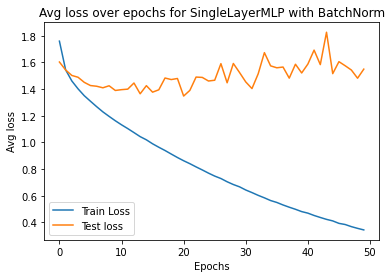

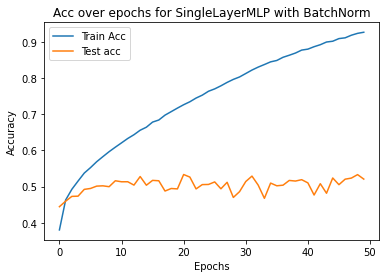

Best train accuracy  0.92706
Best test accuracy  0.5335
Best train loss  0.34279500906211274
Best test loss  1.3480196823400075


In [6]:
import matplotlib.pyplot as plt


train_loss2 = np.load('../result/train_loss2.npy')
test_loss2  =np.load('../result/train_acc2.npy')
train_acc2 = np.load('../result/test_loss2.npy')
test_acc2 = np.load('../result/test_acc2.npy')


plt.plot(range(epoch), train_loss2, label = "Train Loss")
plt.plot(range(epoch), test_loss2, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for SingleLayerMLP with BatchNorm")
plt.show()

plt.plot(range(epoch), train_acc2, label = "Train Acc")
plt.plot(range(epoch), test_acc2, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for SingleLayerMLP with BatchNorm")
plt.show()

print("Best train accuracy ",max(train_acc2))
print("Best test accuracy ",max(test_acc2))
print("Best train loss ",min(train_loss2))
print("Best test loss ",min(test_loss2))

# np.save('../result/model2_w', model2.getWs())
# np.save('../result/model2_b', model2.getbs())

In [7]:
# """
#     Architecture 4
#     Single Linear Layer with 1000 hidden neurons and dropout
# """
# model4     = SingleLayer(input_size, out_size, hiddenlayer=hidden_size, extra = 'dropout', pr=0.5,mm=mm, alpha=mm,lr=lr)
# train_loss4 = []
# test_loss4  = []
# train_acc4  = []
# test_acc4   = []

# start_time = time.time()
# for k in range(epoch):
#     #randomly permute the dataset
#     random_order          = np.random.permutation(train_size)[:crop_trainX]
#     shuffled_trainX       = trainX[random_order, :]
#     shuffled_trainLabels  = trainLabels[random_order, :]
#     batches_trainX        = np.split(shuffled_trainX, num_batches)
#     batches_trainLabels   = np.split(shuffled_trainLabels, num_batches)
    
#     #first train the model
#     total_train_loss      = 0
#     total_acc             = 0
#     for idx, batch_X in enumerate(batches_trainX):
#         batch_labels      = batches_trainLabels[idx]
#         out               = model4.forward(batch_X)
#         #calculate the loss
#         loss, pred        = softmax.forward(out, batch_labels, "NN", get_predictions=True)
#         #softmax returns mean loss for the batch but we want the mean across all the batches
#         #we multiply now and avg later
#         total_train_loss += (loss * batch_size)
#         #calculate acc
#         acc               = softmax.getAcc(batch_labels, pred)
#         total_acc        += acc
        
#         #backpropogate
#         dloss             = softmax.backward()
#         model4.backward(dloss)
#         #update
#         model4.step()
#         #reset
#         model4.zerograd()

#     #avg loss before adding
#     train_loss4.append(total_train_loss / train_size)  
#     train_acc4.append(total_acc / train_size)
    
#     #now evaluate the model on the test set
#     out        = model4.forward(testX, False)
#     loss, pred = softmax.forward(out, testLabels, "NN", get_predictions=True)
#     acc        = softmax.getAcc(testLabels, pred)
#     test_loss4.append(loss)
#     test_acc4.append(acc / test_size)
    
# np.save('../result/train_loss4', train_loss4)
# np.save('../result/train_acc4', test_loss4)
# np.save('../result/test_loss4', train_acc4)
# np.save('../result/test_acc4', test_acc4)

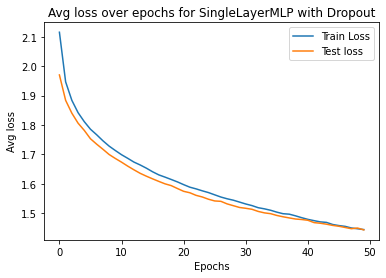

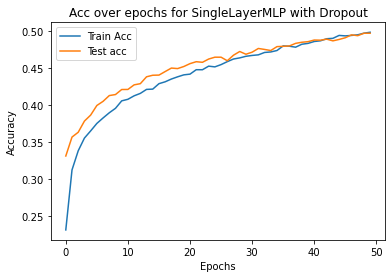

Best train accuracy  0.49864
Best test accuracy  0.4973
Best train loss  1.445049572912725
Best test loss  1.4438440557855006


In [8]:
import matplotlib.pyplot as plt


train_loss4 = np.load('../result/train_loss4.npy')
test_loss4  =np.load('../result/train_acc4.npy')
train_acc4 = np.load('../result/test_loss4.npy')
test_acc4 = np.load('../result/test_acc4.npy')

plt.plot(range(epoch), train_loss4, label = "Train Loss")
plt.plot(range(epoch), test_loss4, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for SingleLayerMLP with Dropout")
plt.show()

plt.plot(range(epoch), train_acc4, label = "Train Acc")
plt.plot(range(epoch), test_acc4, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for SingleLayerMLP with Dropout")
plt.show()

print("Best train accuracy ",max(train_acc4))
print("Best test accuracy ",max(test_acc4))
print("Best train loss ",min(train_loss4))
print("Best test loss ",min(test_loss4))

# np.save('../result/model4_w', model4.getWs())
# np.save('../result/model4_b', model4.getbs())

In [ ]:
# """
#     Architecture 1
#     Single Linear Layer with 1000 hidden neurons
# """
# model1     = SingleLayer(input_size, out_size, hiddenlayer=hidden_size, mm=mm, alpha=mm, lr=lr)
# train_loss = []
# test_loss  = []
# train_acc  = []
# test_acc   = []

# start_time = time.time()
# for k in range(epoch):
#     #randomly permute the dataset
#     random_order          = np.random.permutation(train_size)[:crop_trainX]
#     shuffled_trainX       = trainX[random_order, :]
#     shuffled_trainLabels  = trainLabels[random_order, :]
#     batches_trainX        = np.split(shuffled_trainX, num_batches)
#     batches_trainLabels   = np.split(shuffled_trainLabels, num_batches)
    
#     #first train the model
#     total_train_loss      = 0
#     total_acc             = 0
#     for idx, batch_X in enumerate(batches_trainX):
#         batch_labels      = batches_trainLabels[idx]
#         out               = model1.forward(batch_X)
#         #calculate the loss
#         loss, pred        = softmax.forward(out, batch_labels, "NN", get_predictions=True)
#         #softmax returns mean loss for the batch but we want the mean across all the batches
#         #we multiply now and avg later
#         total_train_loss += (loss * batch_size)
#         #calculate acc
#         acc               = softmax.getAcc(batch_labels, pred)
#         total_acc        += acc
        
#         #backpropogate
#         dloss             = softmax.backward()
#         model1.backward(dloss)
#         #update
#         model1.step()
#         #reset
#         model1.zerograd()
#     #avg loss before adding
#     train_loss.append(total_train_loss / train_size)  
#     train_acc.append(total_acc / train_size)
    
#     #now evaluate the model on the test set
#     out        = model1.forward(testX, False)
#     loss, pred = softmax.forward(out, testLabels, "NN", get_predictions=True)
#     acc        = softmax.getAcc(testLabels, pred)
#     test_loss.append(loss)
#     test_acc.append(acc / test_size)
    
# np.save('../result/train_loss1', train_loss)
# np.save('../result/train_acc1', test_loss)
# np.save('../result/test_loss1', train_acc)
# np.save('../result/test_acc1', test_acc)

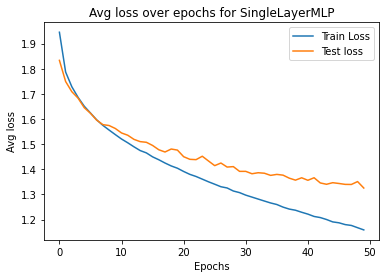

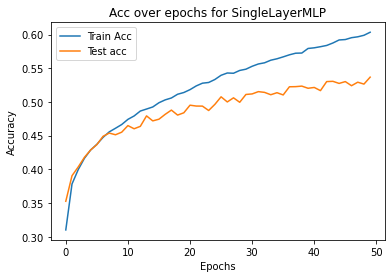

Best train accuracy  0.60344
Best test accuracy  0.5368
Best train loss  1.1587092829682508
Best test loss  1.3253425326951014


In [11]:
import matplotlib.pyplot as plt

train_loss = np.load('../result/train_loss1.npy')
test_loss  =np.load('../result/train_acc1.npy')
train_acc = np.load('../result/test_loss1.npy')
test_acc = np.load('../result/test_acc1.npy')


plt.plot(range(epoch), train_loss, label = "Train Loss")
plt.plot(range(epoch), test_loss, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for SingleLayerMLP")
plt.show()

plt.plot(range(epoch), train_acc, label = "Train Acc")
plt.plot(range(epoch), test_acc, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for SingleLayerMLP")
plt.show()

print("Best train accuracy ",max(train_acc))
print("Best test accuracy ",max(test_acc))
print("Best train loss ",min(train_loss))
print("Best test loss ",min(test_loss))

# np.save('../result/model1_w', model1.getWs())
# np.save('../result/model1_b', model1.getbs())

In [4]:
# """
#     Architecture 3
#     Two Linear Layer with 1000 hidden neurons each
# """
# model3      = TwoLayerMLP(input_size, out_size, hiddenlayers=[hidden_size,hidden_size], alpha=mm, lr=lr)
# train_loss3 = []
# test_loss3  = []
# train_acc3  = []
# test_acc3   = []

# start_time = time.time()
# for k in range(epoch):
#     #randomly permute the dataset
#     random_order          = np.random.permutation(train_size)[:crop_trainX]
#     shuffled_trainX       = trainX[random_order, :]
#     shuffled_trainLabels  = trainLabels[random_order, :]
#     batches_trainX        = np.split(shuffled_trainX, num_batches)
#     batches_trainLabels   = np.split(shuffled_trainLabels, num_batches)
    
#     #first train the model
#     total_train_loss      = 0
#     total_acc             = 0
#     for idx, batch_X in enumerate(batches_trainX):
#         batch_labels      = batches_trainLabels[idx]
#         out               = model3.forward(batch_X)
#         #calculate the loss
#         loss, pred        = softmax.forward(out, batch_labels, "NN", get_predictions=True)
#         #softmax returns mean loss for the batch but we want the mean across all the batches
#         #we multiply now and avg later
#         total_train_loss += (loss * batch_size)
#         #calculate acc
#         acc               = softmax.getAcc(batch_labels, pred)
#         total_acc        += acc
        
#         #backpropogate
#         dloss             = softmax.backward()
#         model3.backward(dloss)
#         #update
#         model3.step()
#         #reset
#         model3.zerograd()
#     #avg loss before adding
#     train_loss3.append(total_train_loss / train_size)  
#     train_acc3.append(total_acc / train_size)
    
#     #now evaluate the model on the test set
#     out        = model3.forward(testX, False)
#     loss, pred = softmax.forward(out, testLabels, "NN", get_predictions=True)
#     acc        = softmax.getAcc(testLabels, pred)
#     test_loss3.append(loss)
#     test_acc3.append(acc / test_size)
    
# np.save('../result/train_loss3', train_loss3)
# np.save('../result/train_acc3', test_loss3)
# np.save('../result/test_loss3', train_acc3)
# np.save('../result/test_acc3', test_acc3)

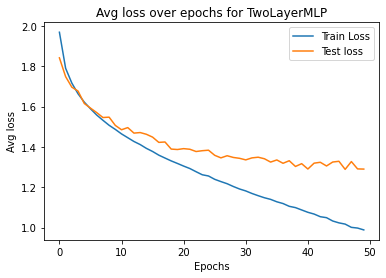

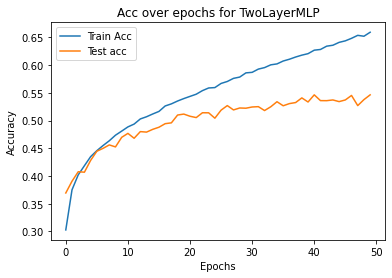

Best train accuracy  0.65922
Best test accuracy  0.5463
Best train loss  0.9884077821094851
Best test loss  1.2887835839816448


In [12]:
import matplotlib.pyplot as plt

plt.plot(range(epoch), train_loss3, label = "Train Loss")
plt.plot(range(epoch), test_loss3, label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Avg loss")
plt.title("Avg loss over epochs for TwoLayerMLP")
plt.show()

plt.plot(range(epoch), train_acc3, label = "Train Acc")
plt.plot(range(epoch), test_acc3, label = "Test acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Acc over epochs for TwoLayerMLP")
plt.show()

print("Best train accuracy ",max(train_acc3))
print("Best test accuracy ",max(test_acc3))
print("Best train loss ",min(train_loss3))
print("Best test loss ",min(test_loss3))

# np.save('../result/model3_w', model3.getWs())
# np.save('../result/model3_b', model3.getbs())